# Tareas calificadas por los compañeros: Análisis de los datos históricos de existencias/ingresos y creación de un cuadro de mando

## Descripción
Extraer datos esenciales de acciones e ingresos y visualizarlos es una parte fundamental de la ciencia de datos; permite a las personas tomar decisiones correctas basadas en los datos. En esta tarea, extraeré datos históricos de acciones e ingresos de Tesla y GameStop, y construiré cuadros de mando para comparar precios de acciones con ingresos.

---

## Tabla de Contenidos
- **Pregunta 1** - Extracción de datos de acciones de Tesla utilizando yfinance 
- **Pregunta 2** - Extracción de datos de ingresos de Tesla utilizando Webscraping
- **Pregunta 3** - Extracción de datos de acciones de GameStop utilizando yfinance 
- **Pregunta 4** - Extracción de datos de ingresos de GameStop utilizando Webscraping
- **Pregunta 5** - Tablero de acciones e ingresos de Tesla
- **Pregunta 6** - Cuadro de mando de acciones e ingresos de GameStop 
- **Pregunta 7** - Compartir su cuaderno de tareas

---


## Pregunta 1: Utilice yfinance para extraer datos bursátiles

### Instrucciones
- Restablezca el índice, guarde y visualice las cinco primeras filas del marco de datos `tesla_data` utilizando la función `head`.

---

In [4]:
import yfinance as yf
import pandas as pd
from IPython.display import display

# Crear el objeto Ticker para Tesla
tesla = yf.Ticker("TSLA")

# Extraer datos históricos de Tesla y guardarlos en un DataFrame
tesla_data = tesla.history(period="max")

# Restablecer el índice del DataFrame
tesla_data.reset_index(inplace=True)

# Aplicar formato a las primeras cinco filas del DataFrame
styled_table = tesla_data.head().style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('font-weight', 'bold'), ('text-align', 'center')]},
        {'selector': 'tbody td', 'props': [('border', '1px solid #ddd'), ('padding', '8px'), ('text-align', 'center')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f9f9f9')]},
        {'selector': 'tbody tr:hover', 'props': [('background-color', '#f1f1f1')]},
    ]
).set_caption("Tesla Stock Data (First 5 Rows)")

# Mostrar la tabla con estilo
display(styled_table)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.000000,0.000000
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.000000,0.000000
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.000000,0.000000
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.000000,0.000000
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.000000,0.000000


## Pregunta 2: Utilice Webscraping para extraer los datos de ingresos de Tesla

### Instrucciones
- Muestra las últimas cinco filas del DataFrame `tesla_revenue` utilizando la función `tail`. Sube una captura de pantalla de los resultados.
---

In [5]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from IPython.display import display

# Paso 1: Crear un DataFrame vacío
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Paso 2: Descargar y parsear el HTML de la página web
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

# Paso 3: Encontrar la tabla relevante
table = soup.find("table")

# Paso 4: Iterar sobre las filas en el cuerpo de la tabla
for row in table.find("tbody").find_all("tr"):
    # Paso 5: Extraer datos de las columnas
    col = row.find_all("td")
    date = col[0].text.strip()
    revenue = col[1].text.strip().replace(",", "").replace("$", "")
    
    # Paso 6: Agregar los datos al DataFrame
    tesla_revenue = pd.concat(
        [tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})],
        ignore_index=True
    )

# Mostrar las últimas cinco filas con formato elegante
styled_table_tail = tesla_revenue.tail().style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('font-weight', 'bold'), ('text-align', 'center')]},
        {'selector': 'tbody td', 'props': [('border', '1px solid #ddd'), ('padding', '8px'), ('text-align', 'center')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f9f9f9')]},
        {'selector': 'tbody tr:hover', 'props': [('background-color', '#f1f1f1')]},
    ]
).set_caption("Tesla Revenue Data (Last 5 Rows)")

# Mostrar la tabla con estilo
display(styled_table_tail)

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


## Pregunta 3: Utilice yfinance para extraer datos bursátiles

### Instrucciones
- Restablezca el índice, guarde y muestre las primeras cinco filas del DataFrame `gme_data` utilizando la función `head`.
---

In [9]:
import yfinance as yf
import pandas as pd
from IPython.display import display

# Paso 1: Crear el objeto Ticker para GameStop
gme = yf.Ticker("GME")
# Paso 2: Extraer datos históricos de GameStop y guardarlos en un DataFrame
gme_data = gme.history(period="max")
# Paso 3: Restablecer el índice del DataFrame
gme_data.reset_index(inplace=True)
# Paso 4: Aplicar formato a las primeras cinco filas del DataFrame
styled_table = gme_data.head().style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('font-weight', 'bold'), ('text-align', 'center')]},
        {'selector': 'tbody td', 'props': [('border', '1px solid #ddd'), ('padding', '8px'), ('text-align', 'center')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f9f9f9')]},
        {'selector': 'tbody tr:hover', 'props': [('background-color', '#f1f1f1')]},
    ]
).set_caption("GameStop Stock Data (First 5 Rows)")

# Paso 5: Mostrar la tabla con estilo
display(styled_table)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.000000,0.000000
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.000000,0.000000
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.000000,0.000000
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.000000,0.000000
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603295,1.662209,6892800,0.000000,0.000000


## Pregunta 4: Utilice Webscraping para extraer los datos de ingresos de GME

### Instrucciones
- Muestre las últimas cinco filas del DataFrame gme_revenue utilizando la función `tail`.
---

In [13]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from IPython.display import display
# Paso 1: Crear un DataFrame vacío
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Paso 2: Descargar y parsear el HTML de la página web
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

# Paso 3: Encontrar la tabla relevante
table = soup.find("table")

# Paso 4: Iterar sobre las filas en el cuerpo de la tabla
for row in table.find("tbody").find_all("tr"):
    # Paso 5: Extraer datos de las columnas
    col = row.find_all("td")
    date = col[0].text.strip()
    revenue = col[1].text.strip().replace(",", "").replace("$", "")
    
    # Paso 6: Agregar los datos al DataFrame
    gme_revenue = pd.concat(
        [gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})],
        ignore_index=True
    )
# Mostrar las últimas cinco filas con formato
styled_table_tail = gme_revenue.tail().style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('font-weight', 'bold'), ('text-align', 'center')]},
        {'selector': 'tbody td', 'props': [('border', '1px solid #ddd'), ('padding', '8px'), ('text-align', 'center')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f9f9f9')]},
        {'selector': 'tbody tr:hover', 'props': [('background-color', '#f1f1f1')]},
    ]
).set_caption("GameStop Revenue Data (Last 5 Rows)")
# Mostrar la tabla con estilo
display(styled_table_tail)

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


## Pregunta 5: Plotear el gráfico de acciones de Tesla

### Instrucciones
- Utilice la función `make_graph` para graficar los datos de acciones de Tesla, proporcionando también un título para el gráfico.
---

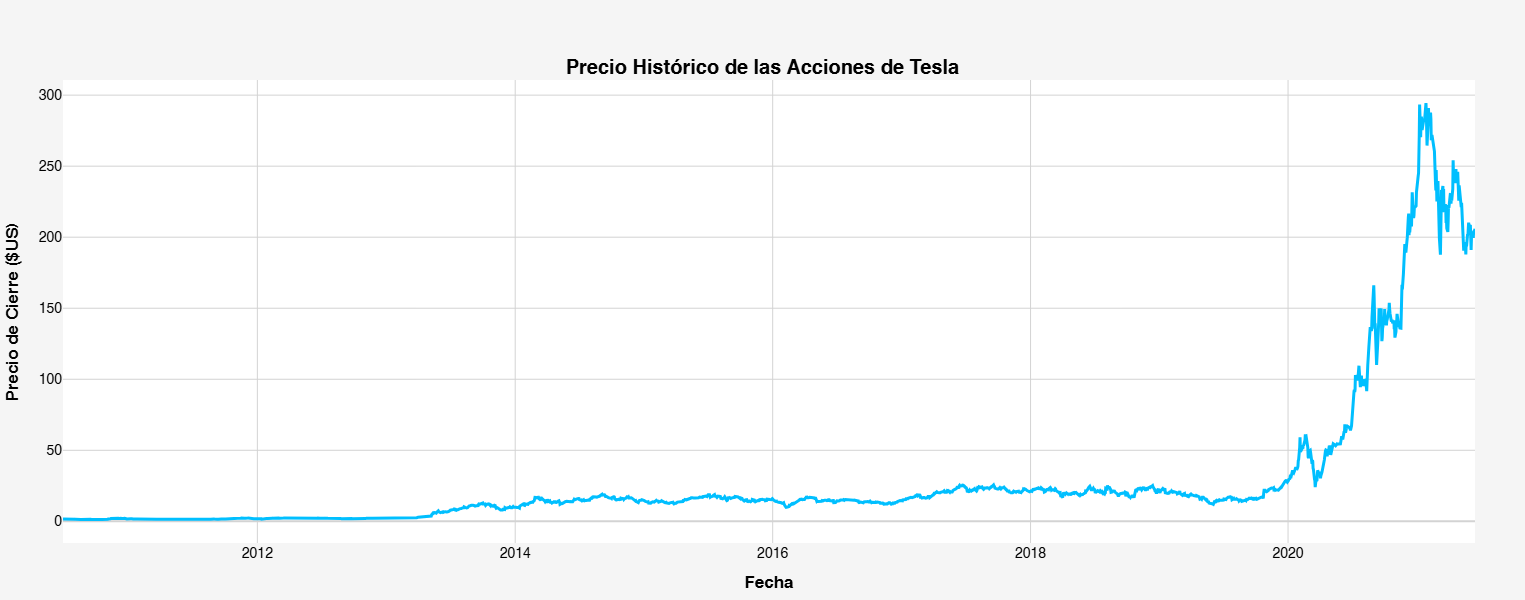

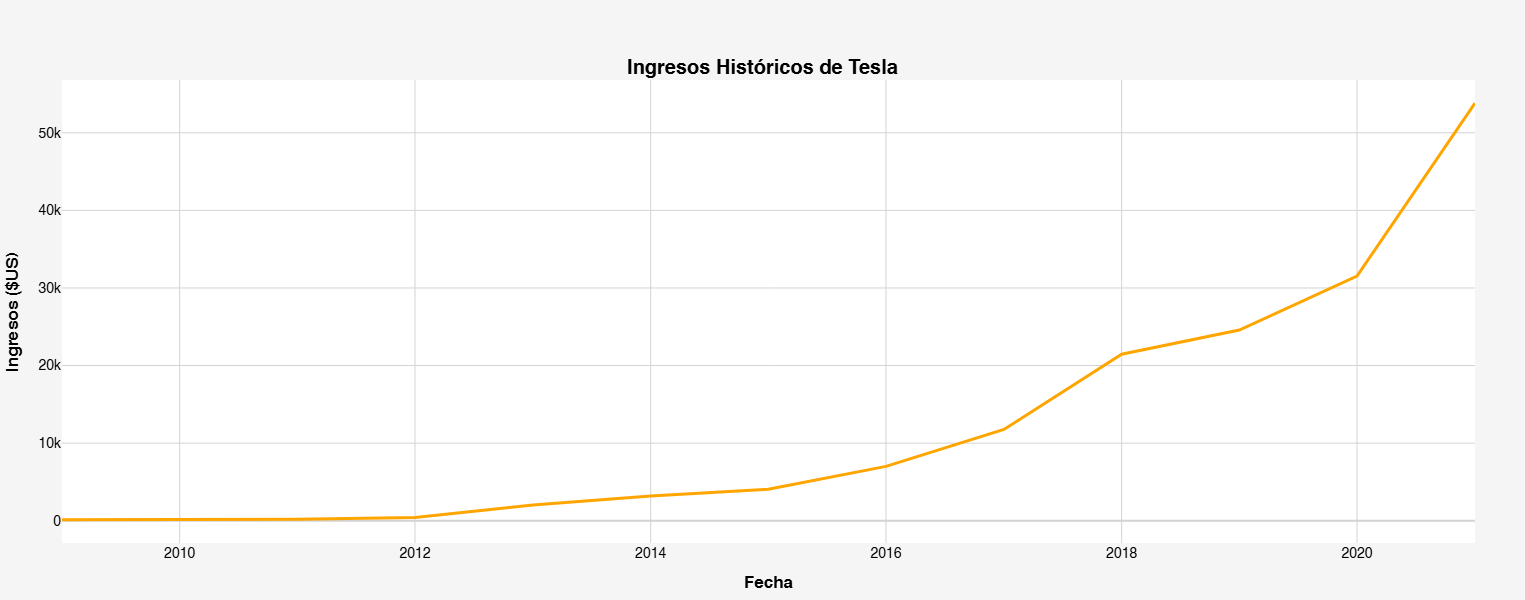

In [46]:
import plotly.graph_objects as go
import pandas as pd

# Función para graficar acciones e ingresos de Tesla con un diseño moderno
def plot_tesla_stock_and_revenue(stock_data, revenue_data, stock_name):
    # Filtrar los datos
    stock_data_specific = stock_data[stock_data["Date"] <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data["Date"] <= '2021-04-30']

    # Gráfico de precios de acciones
    fig_stock = go.Figure()
    fig_stock.add_trace(
        go.Scatter(
            x=pd.to_datetime(stock_data_specific["Date"]),
            y=stock_data_specific["Close"],
            mode='lines',
            name="Precio de Cierre",
            line=dict(color='deepskyblue', width=3)
        )
    )
    fig_stock.update_layout(
        title={
            'text': f"<b>Precio Histórico de las Acciones de {stock_name}</b>",
            'y': 0.9,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(size=20, color='black')
        },
        xaxis_title="<b>Fecha</b>",
        yaxis_title="<b>Precio de Cierre ($US)</b>",
        font=dict(family="Helvetica, sans-serif", size=14, color="black"),
        xaxis=dict(
            showgrid=True,
            gridcolor='lightgrey',
            zeroline=True,
            zerolinecolor='lightgrey'
        ),
        yaxis=dict(
            showgrid=True,
            gridcolor='lightgrey',
            zeroline=True,
            zerolinecolor='lightgrey'
        ),
        plot_bgcolor='white',
        paper_bgcolor='whitesmoke',
        height=600,
        hovermode="x unified",
        margin=dict(l=50, r=50, t=80, b=50),
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="center",
            x=0.5
        )
    )
    fig_stock.show()
    # Gráfico de ingresos
    fig_revenue = go.Figure()
    fig_revenue.add_trace(
        go.Scatter(
            x=pd.to_datetime(revenue_data_specific["Date"]),
            y=revenue_data_specific["Revenue"].astype(float),
            mode='lines',
            name="Ingresos",
            line=dict(color='orange', width=3)
        )
    )
    fig_revenue.update_layout(
        title={
            'text': f"<b>Ingresos Históricos de {stock_name}</b>",
            'y': 0.9,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(size=20, color='black')
        },
        xaxis_title="<b>Fecha</b>",
        yaxis_title="<b>Ingresos ($US)</b>",
        font=dict(family="Helvetica, sans-serif", size=14, color="black"),
        xaxis=dict(
            showgrid=True,
            gridcolor='lightgrey',
            zeroline=True,
            zerolinecolor='lightgrey'
        ),
        yaxis=dict(
            showgrid=True,
            gridcolor='lightgrey',
            zeroline=True,
            zerolinecolor='lightgrey'
        ),
        plot_bgcolor='white',
        paper_bgcolor='whitesmoke',
        height=600,
        hovermode="x unified",
        margin=dict(l=50, r=50, t=80, b=50),
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="center",
            x=0.5
        )
    )
    fig_revenue.show()
# Llamar a la función para graficar Tesla
plot_tesla_stock_and_revenue(tesla_data, tesla_revenue, "Tesla")


## Pregunta 6: Plotear el gráfico de acciones de GameStop

### Instrucciones
- Utilice la función `make_graph` para graficar los datos de acciones de GameStop, proporcionando también un título para el gráfico.
---

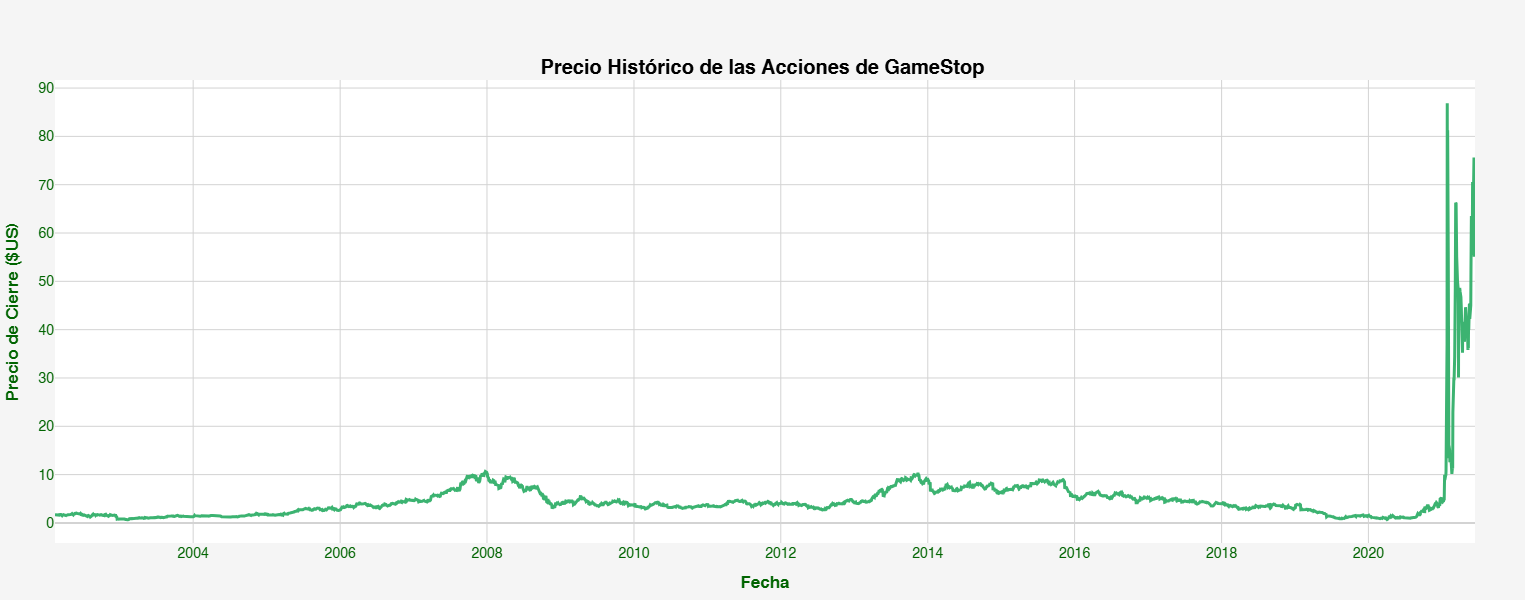

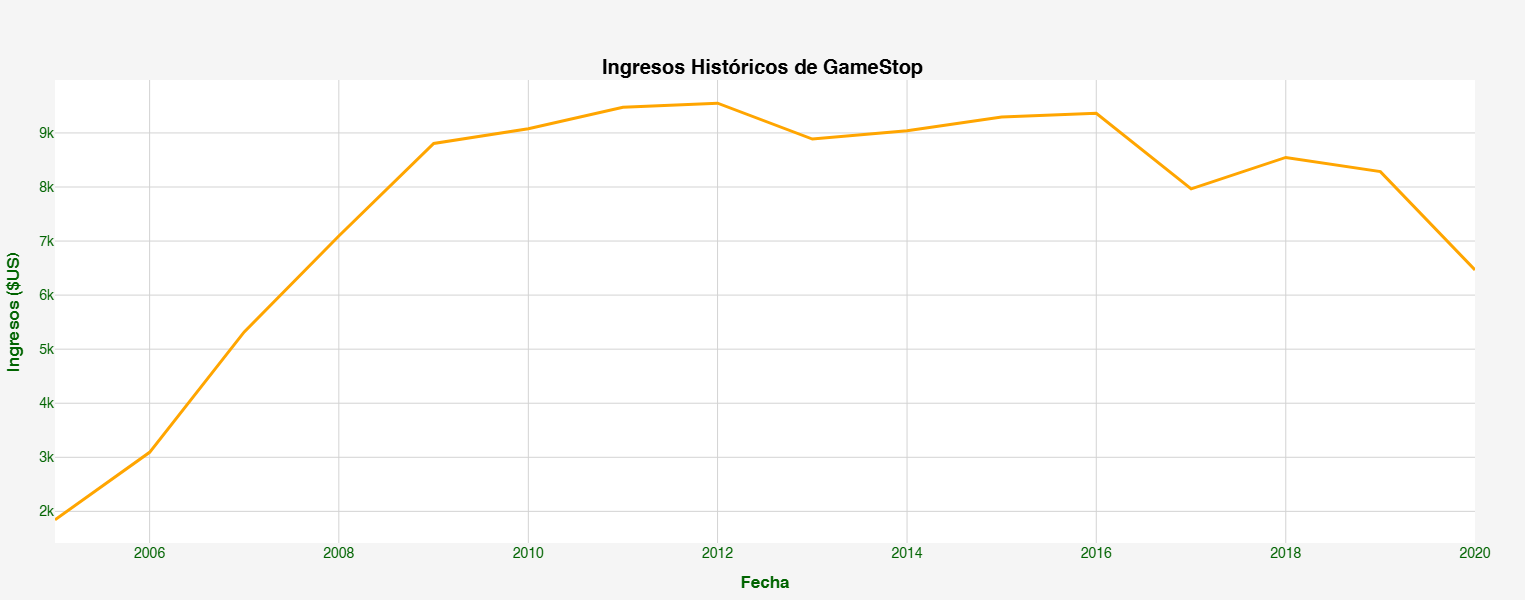

In [48]:
import plotly.graph_objects as go
import pandas as pd

# Función para graficar las acciones e ingresos de GameStop con un diseño moderno
def plot_gamestop_stock_and_revenue_modern(stock_data, revenue_data, stock_name):
    # Filtrar los datos
    stock_data_specific = stock_data[stock_data["Date"] <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data["Date"] <= '2021-04-30']

    # Gráfico de precios de acciones
    fig_stock = go.Figure()
    fig_stock.add_trace(
        go.Scatter(
            x=pd.to_datetime(stock_data_specific["Date"]),
            y=stock_data_specific["Close"],
            mode='lines',
            name="Precio de Cierre",
            line=dict(color='mediumseagreen', width=3)  # Línea verde moderna
        )
    )
    fig_stock.update_layout(
        title={
            'text': f"<b>Precio Histórico de las Acciones de {stock_name}</b>",
            'y': 0.9,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(size=20, color='black')
        },
        xaxis_title="<b>Fecha</b>",
        yaxis_title="<b>Precio de Cierre ($US)</b>",
        font=dict(family="Helvetica, sans-serif", size=14, color="darkgreen"),
        xaxis=dict(
            showgrid=True,
            gridcolor='lightgrey',
            zeroline=True,
            zerolinecolor='lightgrey'
        ),
        yaxis=dict(
            showgrid=True,
            gridcolor='lightgrey',
            zeroline=True,
            zerolinecolor='lightgrey'
        ),
        plot_bgcolor='white',
        paper_bgcolor='whitesmoke',
        height=600,
        hovermode="x unified",
        margin=dict(l=50, r=50, t=80, b=50),
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="center",
            x=0.5
        )
    )
    fig_stock.show()

    # Gráfico de ingresos
    fig_revenue = go.Figure()
    fig_revenue.add_trace(
        go.Scatter(
            x=pd.to_datetime(revenue_data_specific["Date"]),
            y=revenue_data_specific["Revenue"].astype(float),
            mode='lines',
            name="Ingresos",
            line=dict(color='orange', width=3)  # Línea naranja moderna
        )
    )
    fig_revenue.update_layout(
        title={
            'text': f"<b>Ingresos Históricos de {stock_name}</b>",
            'y': 0.9,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(size=20, color='black')
        },
        xaxis_title="<b>Fecha</b>",
        yaxis_title="<b>Ingresos ($US)</b>",
        font=dict(family="Helvetica, sans-serif", size=14, color="darkgreen"),
        xaxis=dict(
            showgrid=True,
            gridcolor='lightgrey',
            zeroline=True,
            zerolinecolor='lightgrey'
        ),
        yaxis=dict(
            showgrid=True,
            gridcolor='lightgrey',
            zeroline=True,
            zerolinecolor='lightgrey'
        ),
        plot_bgcolor='white',
        paper_bgcolor='whitesmoke',
        height=600,
        hovermode="x unified",
        margin=dict(l=50, r=50, t=80, b=50),
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="center",
            x=0.5
        )
    )
    fig_revenue.show()

# Llamar a la función para graficar GameStop
plot_gamestop_stock_and_revenue_modern(gme_data, gme_revenue, "GameStop")


## Autor

### Luis Álvarez Valle
---